# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  9%|▉         | 4/43 [00:00<00:01, 37.76it/s]

[90, 83, 88, 89, 89, 89, 86, 88, 86, 89, 85, 89, 87]
2 chs: 90 entries
3 chs: 83 entries
4 chs: 88 entries
5 chs: 89 entries
6 chs: 89 entries
7 chs: 89 entries
8 chs: 86 entries
9 chs: 88 entries
10 chs: 86 entries
15 chs: 89 entries
20 chs: 85 entries
30 chs: 89 entries
40 chs: 87 entries
Dataset entries: 1079


 77%|███████▋  | 33/43 [00:05<00:03,  2.67it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:06<00:01,  4.46it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 26%|██▌       | 11/43 [00:00<00:02, 13.80it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:05<00:02,  4.56it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00,  6.21it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:07<00:00,  6.07it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 28%|██▊       | 12/43 [00:00<00:01, 16.30it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:04<00:01,  8.60it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:05<00:00, 10.00it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:05<00:00,  7.48it/s]

{'ExtraTreesRegressor', 'Lars', 'LarsCV', 'HistGradientBoostingRegressor', 'HuberRegressor', 'MLPRegressor', 'PoissonRegressor', 'KNeighborsRegressor', 'LinearRegression', 'OrthogonalMatchingPursuitCV', 'XGBRegressor', 'DummyRegressor', 'BaggingRegressor', 'LassoLars', 'NuSVR', 'RidgeCV', 'ElasticNet', 'AdaBoostRegressor', 'TweedieRegressor', 'LassoCV', 'Ridge', 'GaussianProcessRegressor', 'SVR', 'LGBMRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'BayesianRidge', 'TransformedTargetRegressor', 'OrthogonalMatchingPursuit', 'LassoLarsIC', 'Lasso', 'LinearSVR', 'SGDRegressor', 'DecisionTreeRegressor', 'ElasticNetCV', 'GeneralizedLinearRegressor', 'LassoLarsCV', 'ExtraTreeRegressor'}


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoLars', 'ElasticNetCV', 'LarsCV', 'Lasso', 'LassoCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = fontSize)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perVar-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.2, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(BayesianRidge())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 21.  0.] [17.66400862  0.66400862 22.37116629  0.22585798]
[17.  0. 23.  0.] [17.69184618  0.69184618 22.34796274  0.18618228]
[19.  2. 24.  3.] [17.67035364  0.67035364 22.40209498  0.49910146]
[17.  0. 19.  0.] [17.67115147  0.67115147 22.37698727  1.11330088]
[17.  0. 23.  2.] [17.65812451  0.65812451 22.39647565  1.24122209]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(RandomForestRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF".format(count))
count += 1

[17.  0. 21.  0.] [17.59464014  0.60550792 22.33333744  0.21777522]
[17.  0. 23.  0.] [17.74782762  0.76915318 22.5633461   0.15667512]
[19.  2. 24.  3.] [17.70360672  0.69825085 22.51595998  0.48530006]
[17.  0. 19.  0.] [17.70500098  0.71050105 22.51490217  1.18953357]
[17.  0. 23.  2.] [17.64659564  0.65894144 22.45391032  1.28658866]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DecisionTreeRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 21.  0.] [17.59701493  0.59701493 22.31343284  0.2238806 ]
[17.  0. 23.  0.] [17.78571429  0.78571429 22.58571429  0.15714286]
[19.  2. 24.  3.] [17.69117647  0.69117647 22.51470588  0.5       ]
[17.  0. 19.  0.] [17.69230769  0.69230769 22.52307692  1.18461538]
[17.  0. 23.  2.] [17.64383562  0.64383562 22.43835616  1.26027397]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(LassoCV())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 21.  0.] [17.66413043  0.66413043 22.37065217  0.24117975]
[17.  0. 23.  0.] [17.69130435  0.69130435 22.34782609  0.22987144]
[19.  2. 24.  3.] [17.67065217  0.67065217 22.40217391  0.5       ]
[17.  0. 19.  0.] [17.67173913  0.67173913 22.37717391  1.13094357]
[17.  0. 23.  2.] [17.6576087   0.6576087  22.39673913  1.24229091]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DummyRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM".format(count))
count += 1

[17.  0. 21.  0.] [17.66413043  0.66413043 22.37065217  0.72065217]
[17.  0. 23.  0.] [17.69130435  0.69130435 22.34782609  0.71630435]
[19.  2. 24.  3.] [17.67065217  0.67065217 22.40217391  0.725     ]
[17.  0. 19.  0.] [17.67173913  0.67173913 22.37717391  0.72065217]
[17.  0. 23.  2.] [17.6576087   0.6576087  22.39673913  0.69565217]


dict_keys(['LassoLars', 'ElasticNetCV', 'LarsCV', 'Lasso', 'LassoCV'])
### Gain ###
Mean: 1.265065405602644. Median: 1.14711675897078
Mean: 1.2778782341744372. Median: 1.1800299829305478
Mean: 1.2782028626238688. Median: 1.1911764705882337
Mean: 1.2650075614366731. Median: 1.1472826086956527
Mean: 1.2650075614366731. Median: 1.1472826086956527
### Loss ###
Mean: 0.7876868621288237. Median: 0.6772120826059729
Mean: 0.7890663044944668. Median: 0.6656120603388538
Mean: 0.7890204578525675. Median: 0.6666666666666666
Mean: 0.7879093157535099. Median: 0.6852395871781918
Mean: 0.8735519848771267. Median: 0.6978260869565217
Mean Total - Gain: 1.270232325054859. Loss: 0.8054469850212989


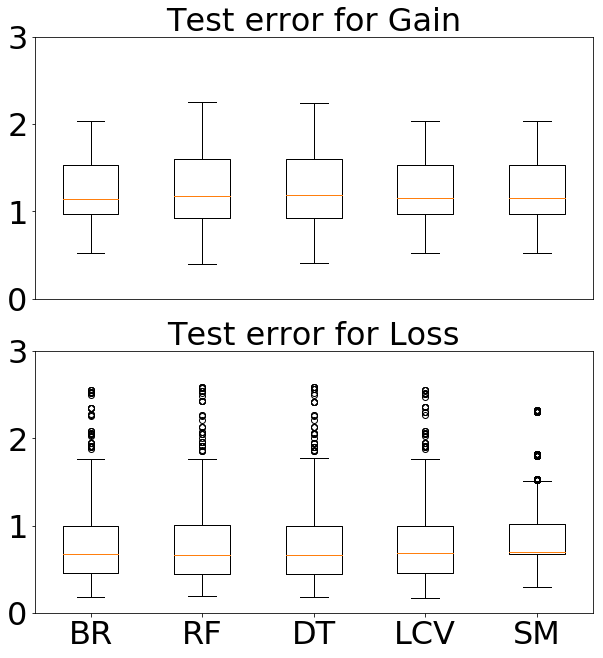

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}".format(np.mean(gainError), np.median(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}".format(np.mean(lossError), np.median(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])